In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
df = pd.read_excel("MSTR-Bitcoin (2018-2025).xlsx", parse_dates=["Date"])

In [3]:
# Step 2: Set the date as the index and ensure correct numerical format
df.set_index("Date", inplace=True)
df['Bitcoin'] = df['Bitcoin'].replace({',': ''}, regex=True).astype(float)

In [4]:
# Step 3: Compute log returns
df['BTC_Return'] = np.log(df['Bitcoin'] / df['Bitcoin'].shift(1))
df['MSTR_Return'] = np.log(df['MSTR'] / df['MSTR'].shift(1))

In [5]:
# Step 4: Drop the first row (NaN from shift)
df_returns = df[['BTC_Return', 'MSTR_Return']].dropna()

In [6]:
df.head()

,MSTR,Bitcoin,BTC_Return,MSTR_Return
Date,,,,
2018-01-02,13.164,14780.86,NaN,NaN
2018-01-03,13.193,15027.10,0.016522,0.002201
2018-01-04,13.326,14949.47,-0.005179,0.010031
2018-01-08,13.477,14938.37,-0.000743,0.011268
2018-01-09,13.669,14510.14,-0.029085,0.014146


In [7]:
# Step 5: Descriptive statistics
print("Descriptive Statistics for Log Returns:")
print(df_returns.describe())

print("\nSkewness:")
print(df_returns.skew())

print("\nKurtosis:")
print(df_returns.kurtosis())

Descriptive Statistics for Log Returns:
        BTC_Return  MSTR_Return
count  1819.000000  1819.000000
mean      0.000945     0.001684
std       0.041918     0.052540
min      -0.321958    -0.350043
25%      -0.017074    -0.017112
50%       0.000425     0.001041
75%       0.020351     0.021136
max       0.260382     0.276886

Skewness:
BTC_Return    -0.341585
MSTR_Return   -0.280980
dtype: float64

Kurtosis:
BTC_Return     6.016637
MSTR_Return    5.968965
dtype: float64


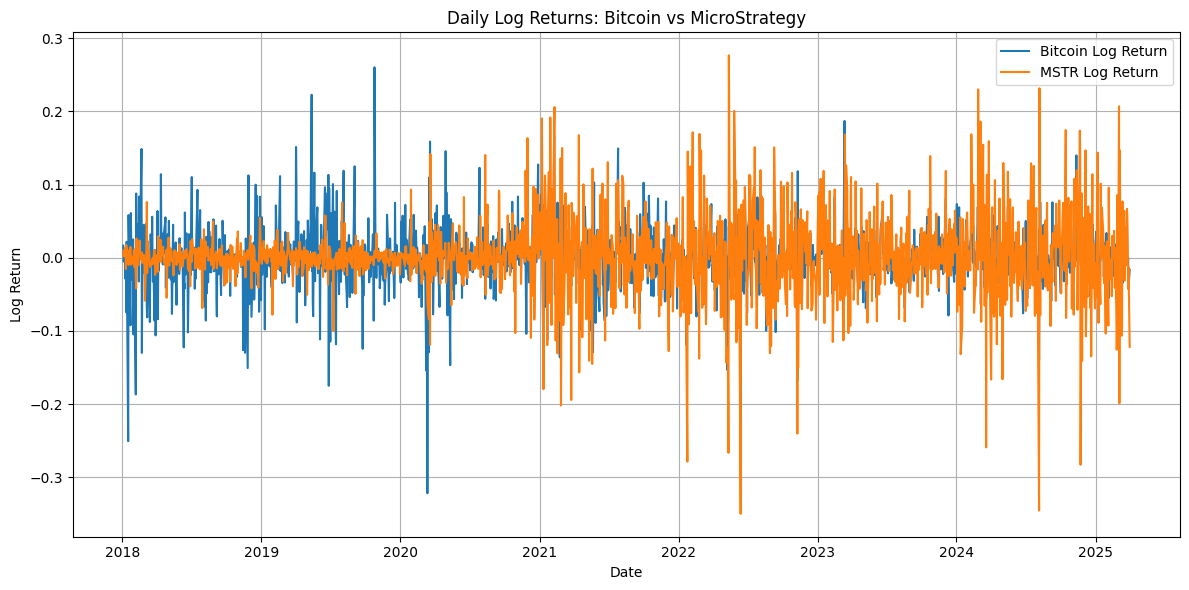

In [8]:
# Step 6: Plot the return series
plt.figure(figsize=(12, 6))
plt.plot(df_returns.index, df_returns['BTC_Return'], label='Bitcoin Log Return')
plt.plot(df_returns.index, df_returns['MSTR_Return'], label='MSTR Log Return')
plt.title("Daily Log Returns: Bitcoin vs MicroStrategy")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()